In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Commuter Hub PCA

In [2]:
# Read the data
data = pd.read_csv('../data/final_combined_com_v2.csv')
data = data.iloc[:,1:]
data.sort_values(by=['total_train_tap_out_volume'], inplace=True, ascending=False)
data

,subzone_name,year_month,total_bus_tap_in_volume,total_bus_tap_out_volume,total_buses_per_hour,inflow_bus_score,outflow_bus_score,total_train_tap_in_volume,total_train_tap_out_volume,inflow_train_score,outflow_train_score
580,PATERSON,2024-12,9.799845e+05,4.481548e+05,463.793297,1.827038e+06,3.228409e+06,1.300435e+07,1.371738e+07,9.187863e+07,8.851054e+07
579,PATERSON,2024-11,9.016887e+05,3.750948e+05,463.793297,1.507226e+06,2.878658e+06,1.120991e+07,1.185721e+07,8.022561e+07,7.685681e+07
581,PATERSON,2025-01,8.914695e+05,3.835133e+05,463.793297,1.513537e+06,2.837777e+06,1.118766e+07,1.181572e+07,7.845230e+07,7.463690e+07
605,PEOPLE'S PARK,2025-01,2.374150e+06,2.967052e+06,1457.665715,7.420988e+06,1.013743e+07,1.028414e+07,9.819401e+06,8.890887e+07,8.528476e+07
603,PEOPLE'S PARK,2024-11,2.018887e+06,2.688093e+06,1457.665715,6.457320e+06,8.373129e+06,1.023009e+07,9.781353e+06,8.913657e+07,8.558947e+07
...,...,...,...,...,...,...,...,...,...,...,...
398,KRANJI,2025-01,4.024886e+04,4.629303e+04,54.771627,1.599126e+05,9.175898e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
399,LAKESIDE (BUSINESS),2024-11,4.749574e+04,6.611447e+04,226.808719,2.261036e+05,1.161432e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
400,LAKESIDE (BUSINESS),2024-12,4.663459e+04,6.546312e+04,226.808719,2.178863e+05,1.145583e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
401,LAKESIDE (BUSINESS),2025-01,4.809354e+04,6.649281e+04,226.808719,2.203835e+05,1.161629e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [3]:
variables = data.iloc[:,2:]
variables= variables.drop("total_buses_per_hour", axis= 1)
variables

,total_bus_tap_in_volume,total_bus_tap_out_volume,inflow_bus_score,outflow_bus_score,total_train_tap_in_volume,total_train_tap_out_volume,inflow_train_score,outflow_train_score
580,9.799845e+05,4.481548e+05,1.827038e+06,3.228409e+06,1.300435e+07,1.371738e+07,9.187863e+07,8.851054e+07
579,9.016887e+05,3.750948e+05,1.507226e+06,2.878658e+06,1.120991e+07,1.185721e+07,8.022561e+07,7.685681e+07
581,8.914695e+05,3.835133e+05,1.513537e+06,2.837777e+06,1.118766e+07,1.181572e+07,7.845230e+07,7.463690e+07
605,2.374150e+06,2.967052e+06,7.420988e+06,1.013743e+07,1.028414e+07,9.819401e+06,8.890887e+07,8.528476e+07
603,2.018887e+06,2.688093e+06,6.457320e+06,8.373129e+06,1.023009e+07,9.781353e+06,8.913657e+07,8.558947e+07
...,...,...,...,...,...,...,...,...
398,4.024886e+04,4.629303e+04,1.599126e+05,9.175898e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
399,4.749574e+04,6.611447e+04,2.261036e+05,1.161432e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
400,4.663459e+04,6.546312e+04,2.178863e+05,1.145583e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
401,4.809354e+04,6.649281e+04,2.203835e+05,1.161629e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [4]:
# Standardize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(variables)


In [5]:
# PCA
pca =PCA(n_components=5)
transformed_data = pca.fit_transform(normalized_data)

explained_variance_ratios = pca.explained_variance_ratio_
print(explained_variance_ratios)
print(transformed_data)

[0.7067803  0.26312911 0.01500278 0.00995105 0.00334401]
[[ 1.41066792e+01  1.11201611e+01 -2.00476060e-02  4.12420608e-01
   8.79437568e-01]
 [ 1.20623966e+01  9.69277302e+00 -1.65193583e-02  4.62954852e-01
   7.16137546e-01]
 [ 1.18942304e+01  9.55217836e+00 -1.33823158e-02  4.49796123e-01
   8.70950091e-01]
 ...
 [-1.28382955e+00  4.34909654e-01  9.59121312e-02 -4.84540706e-02
  -1.93199859e-02]
 [-1.28113242e+00  4.32011113e-01  9.47524158e-02 -4.83944495e-02
  -1.89181532e-02]
 [-4.51124277e-01 -4.60865014e-01 -3.81088915e-01  2.04315767e-01
   2.49074129e-02]]


In [6]:
# Feature importance
first_pc_loadings = pca.components_[0]
print(first_pc_loadings)


[0.34528351 0.33744023 0.34206077 0.35109658 0.36013724 0.36036132
 0.36514928 0.36571288]


In [7]:
weights = np.abs(pca.components_) / np.sum(np.abs(pca.components_), axis=1, keepdims=True)
tryweights = weights[:1]
tryweights

array([[0.12212733, 0.11935316, 0.12098745, 0.12418343, 0.12738113,
        0.12746038, 0.12915389, 0.12935324]])

In [8]:
coefficient_dict = dict(zip(variables.columns, tryweights[0]))
coefficient_dict

{'total_bus_tap_in_volume': 0.12212733488665715,
 'total_bus_tap_out_volume': 0.11935315557133164,
 'inflow_bus_score': 0.12098744670609621,
 'outflow_bus_score': 0.12418342782131628,
 'total_train_tap_in_volume': 0.12738112532184717,
 'total_train_tap_out_volume': 0.127460380849601,
 'inflow_train_score': 0.12915389067706146,
 'outflow_train_score': 0.12935323816608907}

In [9]:
normalized_variables = variables
normalized_variables[:] = normalized_data
normalized_variables

,total_bus_tap_in_volume,total_bus_tap_out_volume,inflow_bus_score,outflow_bus_score,total_train_tap_in_volume,total_train_tap_out_volume,inflow_train_score,outflow_train_score
580,1.242870,0.169326,0.584391,1.304182,9.223465,9.488454,8.463620,8.561741
579,1.082552,0.014292,0.362440,1.095875,7.906810,8.159089,7.350208,7.392063
581,1.061627,0.032156,0.366820,1.071526,7.890479,8.129442,7.180772,7.169251
605,4.097554,5.514430,4.466612,5.419098,7.227528,6.702781,8.179868,8.237971
603,3.370120,4.922478,3.797823,4.368307,7.187871,6.675589,8.201624,8.268555
...,...,...,...,...,...,...,...,...
398,-0.681326,-0.683426,-0.572600,-0.563964,-0.318385,-0.314611,-0.315119,-0.322011
399,-0.666487,-0.641365,-0.526664,-0.549441,-0.318385,-0.314611,-0.315119,-0.322011
400,-0.668251,-0.642747,-0.532367,-0.550385,-0.318385,-0.314611,-0.315119,-0.322011
401,-0.665263,-0.640562,-0.530633,-0.549430,-0.318385,-0.314611,-0.315119,-0.322011


In [10]:
# Multiply each column by the corresponding coefficient
for column_name, coefficient in coefficient_dict.items():
    normalized_variables[column_name] = normalized_variables[column_name] * coefficient

normalized_variables['commuter_score'] = normalized_variables.sum(axis=1)
normalized_variables = pd.concat([data.iloc[:,0:2],normalized_variables],axis=1)
normalized_variables

,subzone_name,year_month,total_bus_tap_in_volume,total_bus_tap_out_volume,inflow_bus_score,outflow_bus_score,total_train_tap_in_volume,total_train_tap_out_volume,inflow_train_score,outflow_train_score,commuter_score
580,PATERSON,2024-12,0.151788,0.020210,0.070704,0.161958,1.174895,1.209402,1.093109,1.107489,4.989555
579,PATERSON,2024-11,0.132209,0.001706,0.043851,0.136089,1.007178,1.039961,0.949308,0.956187,4.266489
581,PATERSON,2025-01,0.129654,0.003838,0.044381,0.133066,1.005098,1.036182,0.927425,0.927366,4.207009
605,PEOPLE'S PARK,2025-01,0.500423,0.658165,0.540404,0.672962,0.920651,0.854339,1.056462,1.065608,6.269014
603,PEOPLE'S PARK,2024-11,0.411584,0.587513,0.459489,0.542471,0.915599,0.850873,1.059272,1.069564,5.896366
...,...,...,...,...,...,...,...,...,...,...,...
398,KRANJI,2025-01,-0.083209,-0.081569,-0.069277,-0.070035,-0.040556,-0.040100,-0.040699,-0.041653,-0.467099
399,LAKESIDE (BUSINESS),2024-11,-0.081396,-0.076549,-0.063720,-0.068232,-0.040556,-0.040100,-0.040699,-0.041653,-0.452905
400,LAKESIDE (BUSINESS),2024-12,-0.081612,-0.076714,-0.064410,-0.068349,-0.040556,-0.040100,-0.040699,-0.041653,-0.454093
401,LAKESIDE (BUSINESS),2025-01,-0.081247,-0.076453,-0.064200,-0.068230,-0.040556,-0.040100,-0.040699,-0.041653,-0.453139


In [11]:
subzone_data = pd.read_csv("../data/subzone_final.csv", index_col = 0)
subzone_data=subzone_data.loc[:,['subzone_name','planning_area_name']]
subzone_data

,subzone_name,planning_area_name
0,DEPOT ROAD,BUKIT MERAH
1,BUKIT MERAH,BUKIT MERAH
2,CHINATOWN,OUTRAM
3,PHILLIP,DOWNTOWN CORE
4,RAFFLES PLACE,DOWNTOWN CORE
...,...,...
327,UPPER THOMSON,BISHAN
328,SHANGRI-LA,ANG MO KIO
329,TOWNSVILLE,ANG MO KIO
330,MARYMOUNT,BISHAN


In [12]:
# Normalize the total column and display final commuter hub ranking
scaler=MinMaxScaler()
normalized_variables['relative_commuter_score'] = normalized_variables.groupby("year_month")['commuter_score'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())
final_com_pca = normalized_variables.sort_values(by='commuter_score',ascending=False)
final_com_pca=final_com_pca.merge(subzone_data, how='left', on='subzone_name')
col_to_move = final_com_pca.pop("planning_area_name")  # Remove column
final_com_pca.insert(0, "planning_area_name", col_to_move)  # Insert at position 0
final_com_pca[(final_com_pca['year_month']=='2025-01')].head(50)

,planning_area_name,subzone_name,year_month,total_bus_tap_in_volume,total_bus_tap_out_volume,inflow_bus_score,outflow_bus_score,total_train_tap_in_volume,total_train_tap_out_volume,inflow_train_score,outflow_train_score,commuter_score,relative_commuter_score
0,OUTRAM,PEOPLE'S PARK,2025-01,0.500423,0.658165,0.540404,0.672962,0.920651,0.854339,1.056462,1.065608,6.269014,1.000000
4,WOODLANDS,WOODLANDS REGIONAL CENTRE,2025-01,0.903086,0.766328,0.981356,0.929448,0.209783,0.251952,0.349719,0.298812,4.690485,0.767111
6,ROCHOR,FARRER PARK,2025-01,0.403833,0.349685,0.452188,0.477466,0.722005,0.763435,0.702982,0.706923,4.578516,0.750592
11,RIVER VALLEY,PATERSON,2025-01,0.129654,0.003838,0.044381,0.133066,1.005098,1.036182,0.927425,0.927366,4.207009,0.695782
12,ROCHOR,VICTORIA,2025-01,0.332973,0.275191,0.340281,0.547431,0.681440,0.693205,0.655852,0.679994,4.206367,0.695687
15,YISHUN,YISHUN CENTRAL,2025-01,0.752486,0.818695,0.664393,0.761931,-0.040556,-0.040100,-0.040699,-0.041653,2.834497,0.493288
20,MUSEUM,DHOBY GHAUT,2025-01,0.221975,0.277762,0.471272,0.384633,0.367886,0.333593,0.256357,0.315982,2.629460,0.463038
22,NEWTON,NEWTON CIRCUS,2025-01,0.133753,0.062349,0.049239,0.074624,0.667710,0.679050,0.480848,0.459682,2.607255,0.459762
23,DOWNTOWN CORE,RAFFLES PLACE,2025-01,-0.030822,-0.052602,-0.035335,0.003403,0.657058,0.639738,0.713405,0.686582,2.581427,0.455951
28,DOWNTOWN CORE,TANJONG PAGAR,2025-01,-0.052577,-0.057734,0.011107,-0.038258,0.566328,0.570096,0.718372,0.692875,2.410208,0.430690


In [13]:
# Save the final score
final_com_pca.to_csv('../data/final_combined_com_pca.csv')

### Future Commuter Hub Score

In [14]:
predicted_growth= pd.read_csv("../data/Population_growth.csv").iloc[:,1:]
predicted_growth['Subzone']= predicted_growth['Subzone'].str.upper()
predicted_growth

,Subzone,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,ADMIRALTY,1.0,1.006169,1.012339,1.018508,1.024678,1.030847,1.037016,1.043186,1.049355,1.055524,1.061694
1,AIRPORT ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALEXANDRA HILL,1.0,0.974991,0.949982,0.924973,0.899963,0.874954,0.849945,0.824936,0.799927,0.774918,0.749908
3,ALEXANDRA NORTH,1.0,1.061637,1.123275,1.184912,1.246550,1.308187,1.369825,1.431462,1.493100,1.554737,1.616375
4,ALJUNIED,1.0,0.999120,0.998240,0.997360,0.996481,0.995601,0.994721,0.993841,0.992961,0.992081,0.991201
...,...,...,...,...,...,...,...,...,...,...,...,...
291,YISHUN SOUTH,1.0,1.005640,1.011280,1.016920,1.022560,1.028200,1.033840,1.039480,1.045120,1.050760,1.056400
292,YISHUN WEST,1.0,0.985696,0.971392,0.957087,0.942783,0.928479,0.914175,0.899870,0.885566,0.871262,0.856958
293,YUHUA EAST,1.0,0.979079,0.958159,0.937238,0.916318,0.895397,0.874477,0.853556,0.832636,0.811715,0.790795
294,YUHUA WEST,1.0,0.990607,0.981215,0.971822,0.962429,0.953037,0.943644,0.934251,0.924859,0.915466,0.906074


In [15]:
future_com_hub_score = final_com_pca.groupby(['planning_area_name','subzone_name']).agg({'commuter_score':'mean'}).reset_index()


In [16]:
future_com_hub_score= future_com_hub_score.merge(predicted_growth, how='left', left_on='subzone_name',right_on='Subzone').drop('Subzone',axis=1)
future_com_hub_score[future_com_hub_score.isnull().any(axis=1)]

,planning_area_name,subzone_name,commuter_score,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
10,ANG MO KIO,YIO CHU KANG NORTH,-0.443676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,CHANGI BAY,CHANGI BAY,-0.505535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,DOWNTOWN CORE,BAYFRONT SUBZONE,0.434588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,DOWNTOWN CORE,MAXWELL,-0.195586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,DOWNTOWN CORE,NICOLL,-0.353834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,HOUGANG,LORONG HALUS,-0.507154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,JURONG EAST,LAKESIDE (BUSINESS),-0.453379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,JURONG EAST,LAKESIDE (LEISURE),-0.375522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,JURONG WEST,SAFTI,-0.498046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,MANDAI,MANDAI EAST,-0.498862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
future_com_hub_score['2025']= future_com_hub_score['2025'].fillna(1)
future_com_hub_score.iloc[:,3:]= future_com_hub_score.iloc[:,3:].mul(future_com_hub_score['commuter_score'],axis=0)
future_com_hub_score

,planning_area_name,subzone_name,commuter_score,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,ANG MO KIO,ANG MO KIO TOWN CENTRE,1.982747,1.982747,1.980232,1.977717,1.975202,1.972686,1.970171,1.967656,1.965141,1.962625,1.960110,1.957595
1,ANG MO KIO,CHENG SAN,0.597564,0.597564,0.590216,0.582868,0.575520,0.568173,0.560825,0.553477,0.546130,0.538782,0.531434,0.524086
2,ANG MO KIO,CHONG BOON,-0.024528,-0.024528,-0.024180,-0.023832,-0.023484,-0.023136,-0.022788,-0.022440,-0.022092,-0.021744,-0.021396,-0.021048
3,ANG MO KIO,KEBUN BAHRU,-0.167156,-0.167156,-0.164856,-0.162556,-0.160256,-0.157956,-0.155657,-0.153357,-0.151057,-0.148757,-0.146457,-0.144157
4,ANG MO KIO,SEMBAWANG HILLS,-0.410443,-0.410443,-0.410235,-0.410026,-0.409817,-0.409609,-0.409400,-0.409192,-0.408983,-0.408774,-0.408566,-0.408357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,YISHUN,SPRINGLEAF,-0.471914,-0.471914,-0.477539,-0.483163,-0.488788,-0.494412,-0.500037,-0.505661,-0.511286,-0.516910,-0.522535,-0.528159
311,YISHUN,YISHUN CENTRAL,2.786927,2.786927,2.909802,3.032677,3.155551,3.278426,3.401301,3.524176,3.647051,3.769925,3.892800,4.015675
312,YISHUN,YISHUN EAST,-0.123112,-0.123112,-0.127570,-0.132029,-0.136487,-0.140945,-0.145404,-0.149862,-0.154320,-0.158778,-0.163237,-0.167695
313,YISHUN,YISHUN SOUTH,-0.024147,-0.024147,-0.024283,-0.024419,-0.024556,-0.024692,-0.024828,-0.024964,-0.025100,-0.025236,-0.025373,-0.025509


In [18]:


baseline_mean = future_com_hub_score.iloc[:, 3:].mean() 
baseline_std = future_com_hub_score.iloc[:, 3:].std()
future_com_hub_score_scaled=future_com_hub_score
future_com_hub_score_scaled.iloc[:,3:] = (future_com_hub_score.iloc[:, 3:] - baseline_mean) / baseline_std


scaler=MinMaxScaler()
future_com_hub_score_scaled.iloc[:,3:]=scaler.fit_transform(future_com_hub_score_scaled.iloc[:,3:])


In [19]:
future_com_hub_score_scaled.sort_values(by='2025',ascending=False).head(20)

,planning_area_name,subzone_name,commuter_score,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
174,OUTRAM,PEOPLE'S PARK,5.969904,1.000000,1.000000,1.000000,0.960466,0.912640,0.876818,0.848985,0.826736,0.808544,0.793393,0.780578
303,WOODLANDS,WOODLANDS REGIONAL CENTRE,4.645747,0.795622,0.879201,0.942507,0.952743,0.941532,0.933134,0.926609,0.921394,0.917129,0.913577,0.910573
218,RIVER VALLEY,PATERSON,4.487684,0.771225,0.886186,0.973193,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
220,ROCHOR,FARRER PARK,4.283471,0.739706,0.811938,0.866756,0.873620,0.861491,0.852407,0.845348,0.839706,0.835093,0.831250,0.828000
227,ROCHOR,VICTORIA,4.123682,0.715043,0.791246,0.849092,0.858924,0.849260,0.842021,0.836397,0.831901,0.828224,0.825163,0.822573
311,YISHUN,YISHUN CENTRAL,2.786927,0.508720,0.648400,0.754391,0.804091,0.824710,0.840154,0.852154,0.861747,0.869590,0.876122,0.881647
156,MUSEUM,DHOBY GHAUT,2.672248,0.491019,0.635702,0.745488,0.798388,0.821464,0.838747,0.852177,0.862912,0.871689,0.879000,0.885183
161,NEWTON,NEWTON CIRCUS,2.554839,0.472898,0.612280,0.718092,0.769093,0.791353,0.808026,0.820981,0.831336,0.839803,0.846855,0.852820
99,DOWNTOWN CORE,RAFFLES PLACE,2.537565,0.470232,0.563485,0.634506,0.662708,0.670355,0.676082,0.680532,0.684089,0.686998,0.689420,0.691469
100,DOWNTOWN CORE,TANJONG PAGAR,2.407386,0.450139,0.594228,0.703619,0.757878,0.782745,0.801370,0.815842,0.827410,0.836869,0.844747,0.851410


In [20]:
future_com_hub_score_scaled.sort_values(by='2035',ascending=False).head(20)

,planning_area_name,subzone_name,commuter_score,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
218,RIVER VALLEY,PATERSON,4.487684,0.771225,0.886186,0.973193,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
303,WOODLANDS,WOODLANDS REGIONAL CENTRE,4.645747,0.795622,0.879201,0.942507,0.952743,0.941532,0.933134,0.926609,0.921394,0.917129,0.913577,0.910573
156,MUSEUM,DHOBY GHAUT,2.672248,0.491019,0.635702,0.745488,0.798388,0.821464,0.838747,0.852177,0.862912,0.871689,0.879000,0.885183
311,YISHUN,YISHUN CENTRAL,2.786927,0.508720,0.648400,0.754391,0.804091,0.824710,0.840154,0.852154,0.861747,0.869590,0.876122,0.881647
117,JURONG EAST,JURONG GATEWAY,2.135282,0.408141,0.567960,0.689271,0.753040,0.784969,0.808884,0.827466,0.842320,0.854465,0.864581,0.873136
161,NEWTON,NEWTON CIRCUS,2.554839,0.472898,0.612280,0.718092,0.769093,0.791353,0.808026,0.820981,0.831336,0.839803,0.846855,0.852820
100,DOWNTOWN CORE,TANJONG PAGAR,2.407386,0.450139,0.594228,0.703619,0.757878,0.782745,0.801370,0.815842,0.827410,0.836869,0.844747,0.851410
220,ROCHOR,FARRER PARK,4.283471,0.739706,0.811938,0.866756,0.873620,0.861491,0.852407,0.845348,0.839706,0.835093,0.831250,0.828000
227,ROCHOR,VICTORIA,4.123682,0.715043,0.791246,0.849092,0.858924,0.849260,0.842021,0.836397,0.831901,0.828224,0.825163,0.822573
258,SUNGEI KADUT,KRANJI,-0.467046,0.006482,0.241806,0.420586,0.538096,0.613618,0.670184,0.714136,0.749269,0.777996,0.801922,0.822158


In [21]:
future_com_hub_score_scaled.to_csv('../data/future_com_hub_score_scaled.csv')

# Accessibility Score PCA

In [22]:
acc_data = pd.read_csv("../data/final_combined_acc_v2.csv", index_col = 0)
inverse_cols = [col for col in acc_data.columns if col.endswith("to_mrt") or col.endswith("_Interval")]
acc_data[inverse_cols] = -acc_data[inverse_cols]
acc_data.head()

,subzone_name,subzone_code,geog_boundary,planning_area_name,area,priv_to_public_ratio,total_bus_tap_in_volume,total_bus_tap_out_volume,total_buses_per_hour,num_bus_stops,...,fare_from_east region_to_mrt,duration_from_north-east region_to_mrt,walking_dist_from_north-east region_to_mrt,fare_from_north-east region_to_mrt,duration_from_north region_to_mrt,walking_dist_from_north region_to_mrt,fare_from_north region_to_mrt,duration_from_west region_to_mrt,walking_dist_from_west region_to_mrt,fare_from_west region_to_mrt
0,ADMIRALTY,SBSZ05,POLYGON Z ((103.828545450459 1.45877524953475 ...,SEMBAWANG,1.270958,0.623183,137532.182430,171045.739431,209.782652,16.522966,...,-2.464000,-4866.400000,-1791.491000,-2.360000,-6217.2,-1662.159000,-2.47,-5385.108333,-2116.052,-2.38973
1,AIRPORT ROAD,PLSZ04,POLYGON Z ((103.901327898145 1.35658812288024 ...,PAYA LEBAR,0.486377,0.438736,46088.367695,46152.104231,63.222531,6.168052,...,-2.464000,-4866.400000,-1791.491000,-2.360000,-6217.2,-1662.159000,-2.47,-5385.108333,-2116.052,-2.38973
2,ALEXANDRA HILL,BMSZ07,POLYGON Z ((103.81444653879 1.28547429883476 0...,BUKIT MERAH,1.037840,0.313048,408694.021923,499763.616300,472.013995,23.124952,...,-2.464000,-4866.400000,-1791.491000,-2.360000,-6217.2,-1662.159000,-2.47,-5385.108333,-2116.052,-2.38973
3,ALEXANDRA NORTH,BMSZ06,POLYGON Z ((103.817404504805 1.29433192068692 ...,BUKIT MERAH,0.295823,0.258394,166908.374821,135139.375783,274.234949,13.521600,...,-2.464000,-4866.400000,-1791.491000,-2.360000,-6217.2,-1662.159000,-2.47,-5385.108333,-2116.052,-2.38973
4,ALJUNIED,GLSZ04,POLYGON Z ((103.891267385312 1.32131770982548 ...,GEYLANG,2.982971,0.518057,518701.385040,534555.599716,445.487025,15.085630,...,-1.683333,-2465.333333,-1133.783333,-1.836667,-4263.0,-1240.456667,-2.25,-3973.666667,-1229.460,-2.15000


In [23]:
acc_var = acc_data.iloc[:, 5:]
acc_bus_df = acc_var.iloc[:,1:15]
acc_mrt_df = acc_var.iloc[:,15:]

scaler = StandardScaler()
acc_norm = scaler.fit_transform(acc_var)
acc_bus = scaler.fit_transform(acc_bus_df)
acc_mrt = scaler.fit_transform(acc_mrt_df)

In [24]:
acc_pca = PCA()
acc_pca.fit(acc_norm)

transformed_data = acc_pca.transform(acc_norm)
explained_variance_ratio = acc_pca.explained_variance_ratio_

print(f"Explained variance ratio:{explained_variance_ratio}")
"""
pca components multiplied by the square root of the explained variance ratio
square root applied to scale loadings based on how much variance each principle component explains, which makes loadings more representative of 
variance captured by each component

"""
def get_weights(model):
    component_loadings = model.components_.T * np.sqrt(model.explained_variance_ratio_)
    weights = np.abs(component_loadings)/np.sum(np.abs(component_loadings), axis = 1, keepdims = True)
    return weights

weights = get_weights(acc_pca)

print(f"Weights derived for Accessibility Score:{weights}")

weighted_df = acc_var * weights[:,0] # used first principal component for weights
acc_data["acc_score"] = weighted_df.sum(axis = 1)

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the accessibility_index column
acc_data["acc_score_scaled"] = scaler.fit_transform(acc_data[["acc_score"]])


acc_bus_pca = PCA()
acc_bus_pca.fit(acc_bus)
acc_bus_transformed = acc_bus_pca.transform(acc_bus)
acc_bus_weights = get_weights(acc_bus_pca)
bus_weighted_df = acc_bus * acc_bus_weights[:1]
acc_data["bus_acc_score"] = bus_weighted_df.sum(axis = 1)

acc_data["bus_acc_score_scaled"] = scaler.fit_transform(acc_data[["bus_acc_score"]])

acc_mrt_pca = PCA()
acc_mrt_pca.fit(acc_mrt)
acc_mrt_transformed = acc_mrt_pca.transform(acc_mrt)
acc_mrt_weights = get_weights(acc_mrt_pca)
mrt_weighted_df = acc_mrt * acc_mrt_weights[:1]
acc_data["mrt_acc_score"] = mrt_weighted_df.sum(axis = 1)

acc_data["mrt_acc_score_scaled"] = scaler.fit_transform(acc_data[["mrt_acc_score"]])


Explained variance ratio:[3.88804575e-01 1.71936910e-01 1.12561166e-01 7.20426103e-02
 4.78609594e-02 3.25500254e-02 2.60211967e-02 2.01259678e-02
 1.92581084e-02 1.54807672e-02 1.49390755e-02 1.04340415e-02
 9.63036276e-03 8.34928475e-03 7.76821521e-03 7.24518931e-03
 6.31395545e-03 5.18065422e-03 3.12421636e-03 2.73423369e-03
 2.64668609e-03 2.28540137e-03 2.22157359e-03 1.93709427e-03
 1.72447469e-03 1.38520370e-03 1.16263036e-03 1.00488009e-03
 7.58359754e-04 7.39721164e-04 5.27931246e-04 4.97707486e-04
 4.55525807e-04 2.79941417e-04 1.13548236e-05]
Weights derived for Accessibility Score:[[2.77873015e-02 6.73550008e-02 2.88181002e-02 ... 1.51020857e-04
  3.79916074e-05 1.47630426e-05]
 [1.51816320e-01 8.03062465e-02 2.26702331e-01 ... 2.76037815e-02
  3.63601297e-03 4.26272103e-04]
 [1.50019758e-01 8.62635891e-02 2.30342476e-01 ... 2.95929468e-02
  3.64977518e-03 3.62198253e-04]
 ...
 [2.94057353e-01 5.11378405e-02 7.39511270e-02 ... 1.81947355e-03
  1.88954528e-02 4.78241575e-05]

In [25]:
acc_coefficient_dict = dict(zip(acc_var.columns, weights[:,0])) # first principal component weights
acc_coefficient_dict

{'priv_to_public_ratio': 0.02778730150163955,
 'total_bus_tap_in_volume': 0.1518163202469168,
 'total_bus_tap_out_volume': 0.15001975830381725,
 'total_buses_per_hour': 0.14960740872290598,
 'num_bus_stops': 0.09224970827276746,
 'num_bus_services': 0.14262649927922444,
 'mean_bus_distance': 0.05318494427358365,
 'AM_Peak_Min_Interval': 0.06574661232434359,
 'AM_Peak_Max_Interval': 0.03681943527433169,
 'AM_Offpeak_Min_Interval': 0.07703220515858798,
 'AM_Offpeak_Max_Interval': 0.05689409310516783,
 'PM_Peak_Min_Interval': 0.0820673343295544,
 'PM_Peak_Max_Interval': 0.06754911743971571,
 'PM_Offpeak_Min_Interval': 0.09534986216331562,
 'PM_Offpeak_Max_Interval': 0.03912313459576386,
 'num_stations_per_subzone': 0.23973104742729698,
 'num_train_lines_per_subzone': 0.23427689722237538,
 'num_rail_types_per_subzone': 0.2674709047775872,
 'total_train_tap_in_volume': 0.2330871852088668,
 'total_train_tap_out_volume': 0.2291325975147077,
 'duration_from_central region_to_mrt': 0.3190067246

In [26]:
bus_coefficient_dict = dict(zip(acc_bus_df.columns, acc_bus_weights[:,0])) # first principal component weights
bus_coefficient_dict

{'total_bus_tap_in_volume': 0.05504561727521815,
 'total_bus_tap_out_volume': 0.06817106095463776,
 'total_buses_per_hour': 0.07649710023038743,
 'num_bus_stops': 0.06785640464611871,
 'num_bus_services': 0.05453194966592397,
 'mean_bus_distance': 0.06046701869815117,
 'AM_Peak_Min_Interval': 0.3910129962815479,
 'AM_Peak_Max_Interval': 0.37838683506962795,
 'AM_Offpeak_Min_Interval': 0.43799677626868355,
 'AM_Offpeak_Max_Interval': 0.3596890254248366,
 'PM_Peak_Min_Interval': 0.45835162992753786,
 'PM_Peak_Max_Interval': 0.41629215283740895,
 'PM_Offpeak_Min_Interval': 0.4436119770627015,
 'PM_Offpeak_Max_Interval': 0.327770254602553}

In [27]:
mrt_coefficient_dict = dict(zip(acc_mrt_df.columns, acc_mrt_weights[:,0])) # first principal component weights
mrt_coefficient_dict

{'num_stations_per_subzone': 0.30691233644040955,
 'num_train_lines_per_subzone': 0.3004992638369262,
 'num_rail_types_per_subzone': 0.33900883759993267,
 'total_train_tap_in_volume': 0.30876014239156774,
 'total_train_tap_out_volume': 0.30358096249582495,
 'duration_from_central region_to_mrt': 0.4471523219576325,
 'walking_dist_from_central region_to_mrt': 0.46056800822157296,
 'fare_from_central region_to_mrt': 0.32023886451251043,
 'duration_from_east region_to_mrt': 0.4282576564359281,
 'walking_dist_from_east region_to_mrt': 0.39087449109861044,
 'fare_from_east region_to_mrt': 0.2918342709416035,
 'duration_from_north-east region_to_mrt': 0.46482282605949155,
 'walking_dist_from_north-east region_to_mrt': 0.41601304767380437,
 'fare_from_north-east region_to_mrt': 0.28920997905223506,
 'duration_from_north region_to_mrt': 0.39043922856833296,
 'walking_dist_from_north region_to_mrt': 0.4338906972069722,
 'fare_from_north region_to_mrt': 0.2554530882904054,
 'duration_from_west r

In [28]:
acc_data.head()

,subzone_name,subzone_code,geog_boundary,planning_area_name,area,priv_to_public_ratio,total_bus_tap_in_volume,total_bus_tap_out_volume,total_buses_per_hour,num_bus_stops,...,fare_from_north region_to_mrt,duration_from_west region_to_mrt,walking_dist_from_west region_to_mrt,fare_from_west region_to_mrt,acc_score,acc_score_scaled,bus_acc_score,bus_acc_score_scaled,mrt_acc_score,mrt_acc_score_scaled
0,ADMIRALTY,SBSZ05,POLYGON Z ((103.828545450459 1.45877524953475 ...,SEMBAWANG,1.270958,0.623183,137532.182430,171045.739431,209.782652,16.522966,...,-2.47,-5385.108333,-2116.052,-2.38973,35070.729642,0.008010,-0.292918,0.173994,-0.492268,0.000000
1,AIRPORT ROAD,PLSZ04,POLYGON Z ((103.901327898145 1.35658812288024 ...,PAYA LEBAR,0.486377,0.438736,46088.367695,46152.104231,63.222531,6.168052,...,-2.47,-5385.108333,-2116.052,-2.38973,2421.314186,0.002394,-0.835690,0.077915,-0.492268,0.000000
2,ALEXANDRA HILL,BMSZ07,POLYGON Z ((103.81444653879 1.28547429883476 0...,BUKIT MERAH,1.037840,0.313048,408694.021923,499763.616300,472.013995,23.124952,...,-2.47,-5385.108333,-2116.052,-2.38973,125600.273306,0.023584,0.385933,0.294161,-0.492268,0.000000
3,ALEXANDRA NORTH,BMSZ06,POLYGON Z ((103.817404504805 1.29433192068692 ...,BUKIT MERAH,0.295823,0.258394,166908.374821,135139.375783,274.234949,13.521600,...,-2.47,-5385.108333,-2116.052,-2.38973,34155.351201,0.007853,-0.274549,0.177245,-0.492268,0.000000
4,ALJUNIED,GLSZ04,POLYGON Z ((103.891267385312 1.32131770982548 ...,GEYLANG,2.982971,0.518057,518701.385040,534555.599716,445.487025,15.085630,...,-2.25,-3973.666667,-1229.460,-2.15000,318111.624629,0.056700,0.316793,0.281922,0.257375,0.095818


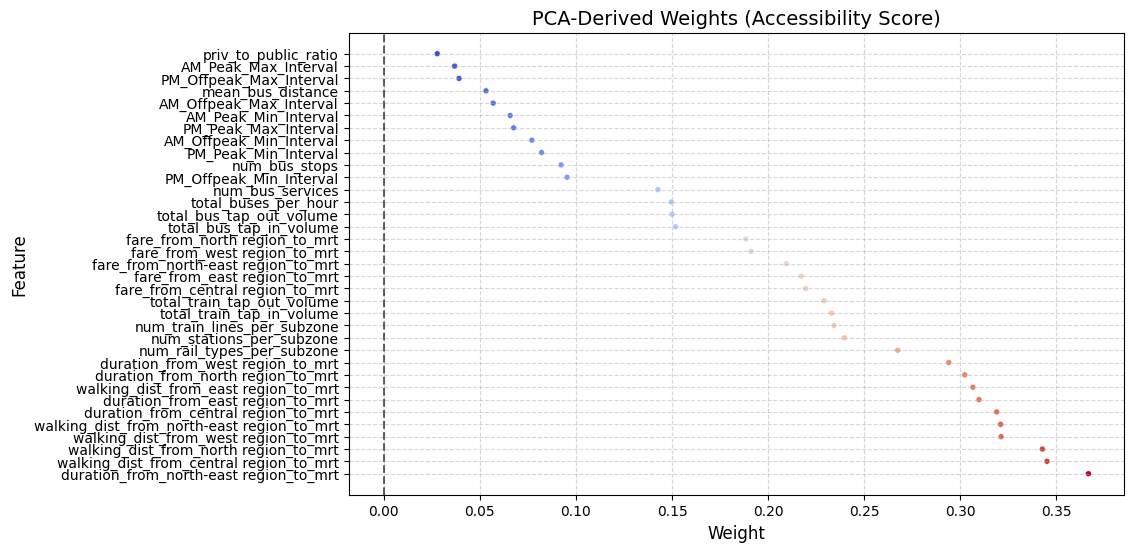

In [29]:
# Convert dictionary to DataFrame for easy plotting
acc_weights_df = pd.DataFrame(list(acc_coefficient_dict.items()), columns=["Feature", "Weight"])
acc_weights_df = acc_weights_df.sort_values(by="Weight", ascending=True) # sort by weight

# Scatter Plot of PCA Weights
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Weight", y="Feature", data = acc_weights_df, hue="Weight", palette="coolwarm", size=5, legend=False)

plt.axvline(x=0, color="black", linestyle="--", alpha=0.6)
plt.title("PCA-Derived Weights (Accessibility Score)", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

## Accessibililty Score of PT across hours in a day

In [30]:
hourly_data = pd.read_csv("../data/pt_hourly.csv", index_col = 0)
#limit to nearest year_month
hourly_data = hourly_data[(hourly_data['YEAR_MONTH']=='2025-01')]

hourly_var = hourly_data.iloc[:,3:]
            
scaler = StandardScaler()
hourly_norm = scaler.fit_transform(hourly_var)

hourly_pca = PCA()
hourly_pca.fit(hourly_norm)

hourly_weights = get_weights(hourly_pca)
hourly_weighted_df = hourly_var * hourly_weights[:1]
hourly_data["acc_score"] = hourly_weighted_df.sum(axis = 1)

# scale acc score to range (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
hourly_data["acc_score_scaled"] = scaler.fit_transform(hourly_data[["acc_score"]])

hourly_data[(hourly_data['subzone_name']=='RAFFLES PLACE')].head()

,subzone_name,hour,YEAR_MONTH,total_bus_trips_inbound,total_bus_trips_outbound,total_train_trips_inbound,total_train_trips_outbound,acc_score,acc_score_scaled
290,RAFFLES PLACE,0,2025-01,2.333333,4.49375,2.142857,8.863248,3.1666,0.005875
293,RAFFLES PLACE,1,2025-01,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000
296,RAFFLES PLACE,2,2025-01,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000
299,RAFFLES PLACE,3,2025-01,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000
302,RAFFLES PLACE,4,2025-01,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000


## Projection Function for Acc Score

In [31]:
subzone = pd.read_csv("../data/subzone_final.csv", index_col = 0)
subzone = subzone[["subzone_name","geog_boundary"]]
subzone = gpd.GeoDataFrame(subzone, geometry=gpd.GeoSeries.from_wkt(subzone["geog_boundary"]), crs="EPSG:4326") 
subzone.head()

,subzone_name,geog_boundary,geometry
0,DEPOT ROAD,POLYGON Z ((103.814542206408 1.28238675809122 ...,"POLYGON Z ((103.81454 1.28239 0, 103.81774 1.2..."
1,BUKIT MERAH,POLYGON Z ((103.822087677142 1.28049448959193 ...,"POLYGON Z ((103.82209 1.28049 0, 103.8221 1.28..."
2,CHINATOWN,POLYGON Z ((103.843752427547 1.28507938173851 ...,"POLYGON Z ((103.84375 1.28508 0, 103.844 1.284..."
3,PHILLIP,POLYGON Z ((103.849619049458 1.28411912067044 ...,"POLYGON Z ((103.84962 1.28412 0, 103.84955 1.2..."
4,RAFFLES PLACE,POLYGON Z ((103.85252728092 1.28616568617335 0...,"POLYGON Z ((103.85253 1.28617 0, 103.85253 1.2..."


In [32]:
# user can input lat, lng and num of bus/train stations to vary to imagine how it would change when new bus stop or train station is added
def get_projected_score(lat,lng, n_bus_diff, n_train_diff, df, weights_dict):
    plc = gpd.GeoDataFrame(geometry=[Point(lng, lat)], crs="EPSG:4326") 
    subzone_match = gpd.sjoin(plc, subzone, how="inner", predicate="within")
    if subzone_match.empty:
        return None
    subzone_name = subzone_match.iloc[0]["subzone_name"]
    data = df.loc[df["subzone_name"] == subzone_name]
    # make a copy
    var = data.iloc[:, 5:].copy()

    # retrieve indices for bus and train columns before amending the values
    bus_ind = var.columns.get_loc("num_bus_stops")
    train_ind = var.columns.get_loc("num_stations_per_subzone")
    var.iloc[0, bus_ind] = max(var.iloc[0, bus_ind] + n_bus_diff, 0)
    var.iloc[0, train_ind] = max(var.iloc[0, train_ind] + n_train_diff, 0)

    # highlight the columns to normalise by area
    columns_to_normalize = [
    "num_bus_stops","num_bus_services",
    "num_stations_per_subzone", "num_train_lines_per_subzone",
    "num_rail_types_per_subzone","total_bus_tap_in_volume","total_bus_tap_out_volume",
    "total_buses_per_hour","total_train_tap_in_volume","total_train_tap_out_volume"
    ]

    # Perform element-wise division by 'area', avoiding division by zero
    var[columns_to_normalize] = var[columns_to_normalize].div(data["area"], axis=0)
    
    # Extract weights from dict
    weights = np.array([weights_dict[col] for col in var.columns])

    # Apply weights to find the new acc score with different no of train stations and bus stops
    new_acc_score = np.dot(weights, var.values.flatten())

    return new_acc_score

In [33]:
# retrieve acc data before normalisation
prenorm_data = pd.read_csv("../data/final_combined_acc.csv", index_col = 0)
prenorm_data[inverse_cols] = -prenorm_data[inverse_cols]
prenorm_var = prenorm_data.iloc[:, 5:]
prenorm_data.shape

(315, 40)

In [34]:
# Test projected score function

# Dummy location below falls within Central Water Catchment subzone
lat = 1.3521  # Latitude of the location
lng = 103.8198  # Longitude of the location
n_bus_diff = 2  # Increase in the number of bus stations
n_train_diff = 1  # Increase in the number of train stations

# Calculate the projected score
score = get_projected_score(lat, lng, n_bus_diff, n_train_diff, prenorm_data, acc_coefficient_dict)
if score is not None:
    print("Projected Accessibility Score:", score)
else:
    print("The provided coordinates do not fall within any subzone.")

# To obtain scaled value of new accessibility score
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the existing accessibility scores
scaler.fit(acc_data[["acc_score"]])
new_acc_score_scaled = scaler.transform([[score]])[0][0]
print("Scaled Projected Accessibility Score:", new_acc_score_scaled)

Projected Accessibility Score: -10321.09257976624
Scaled Projected Accessibility Score: 0.0002019814538259761


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## EDA for Accessibility Score

In [35]:
# Aggregate by planning area
planning_agg = acc_data.groupby(["planning_area_name"]).agg(
    mean_access = ("acc_score_scaled", "mean"),
    mean_access_bus = ("bus_acc_score_scaled", "mean"),
    mean_access_mrt = ("mrt_acc_score_scaled", "mean")
).reset_index()
planning_agg.sort_values(by="mean_access", ascending=False).head(50)

,planning_area_name,mean_access,mean_access_bus,mean_access_mrt
27,OUTRAM,0.326152,0.437398,0.345890
34,ROCHOR,0.239766,0.400248,0.176428
33,RIVER VALLEY,0.222093,0.176347,0.159879
23,MUSEUM,0.180381,0.498214,0.309565
13,DOWNTOWN CORE,0.143095,0.252983,0.159265
24,NEWTON,0.131000,0.160661,0.094897
26,ORCHARD,0.128477,0.378408,0.100704
39,SINGAPORE RIVER,0.074856,0.284634,0.117729
49,WOODLANDS,0.073969,0.291161,0.053386
11,CHOA CHU KANG,0.056738,0.268339,0.067733


In [36]:
planning_agg.describe()

,mean_access,mean_access_bus,mean_access_mrt
count,51.000000,51.000000,51.000000
mean,0.049204,0.200184,0.062662
std,0.067243,0.101122,0.071119
min,0.000039,0.000000,0.000000
25%,0.006289,0.121132,0.015143
50%,0.032785,0.204828,0.043537
75%,0.046749,0.263771,0.090584
max,0.326152,0.498214,0.345890


/var/folders/yj/8qrtgn4s6kb6mhh8f09ypm5r0000gn/T/ipykernel_10194/3188704121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="planning_area_name", x="mean_access", data=top_10, ax=ax[0], palette="Greens_r")
/var/folders/yj/8qrtgn4s6kb6mhh8f09ypm5r0000gn/T/ipykernel_10194/3188704121.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="planning_area_name", x="mean_access", data=bottom_10, ax=ax[1], palette="Reds_r")


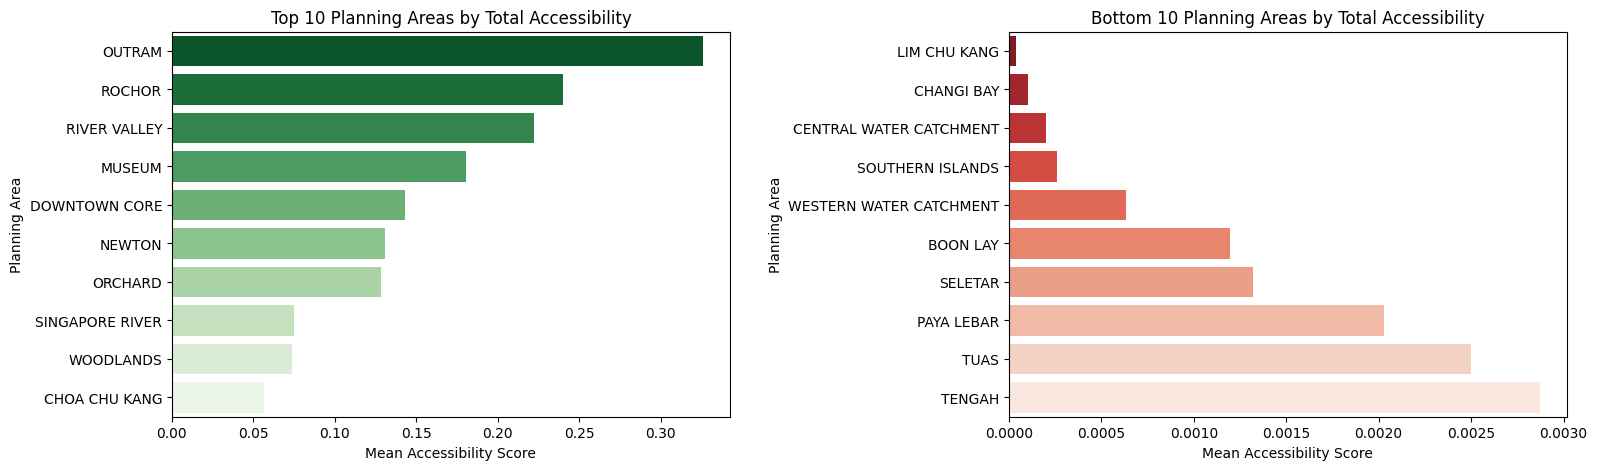

In [37]:
top_10 = planning_agg.nlargest(10, "mean_access")
bottom_10 = planning_agg.nsmallest(10, "mean_access")
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Top 10 planning areas
sns.barplot(y="planning_area_name", x="mean_access", data=top_10, ax=ax[0], palette="Greens_r")
ax[0].set_title("Top 10 Planning Areas by Total Accessibility")
ax[0].set_xlabel("Mean Accessibility Score")
ax[0].set_ylabel("Planning Area")

# Bottom 10 planning areas
sns.barplot(y="planning_area_name", x="mean_access", data=bottom_10, ax=ax[1], palette="Reds_r")
ax[1].set_title("Bottom 10 Planning Areas by Total Accessibility")
ax[1].set_xlabel("Mean Accessibility Score")
ax[1].set_ylabel("Planning Area")

plt.subplots_adjust(wspace=0.5) 

/var/folders/yj/8qrtgn4s6kb6mhh8f09ypm5r0000gn/T/ipykernel_10194/3658852313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="planning_area_name", x="mean_access_bus", data=top_10, ax=ax[0], palette="Greens_r")
/var/folders/yj/8qrtgn4s6kb6mhh8f09ypm5r0000gn/T/ipykernel_10194/3658852313.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="planning_area_name", x="mean_access_bus", data=bottom_10, ax=ax[1], palette="Reds_r")


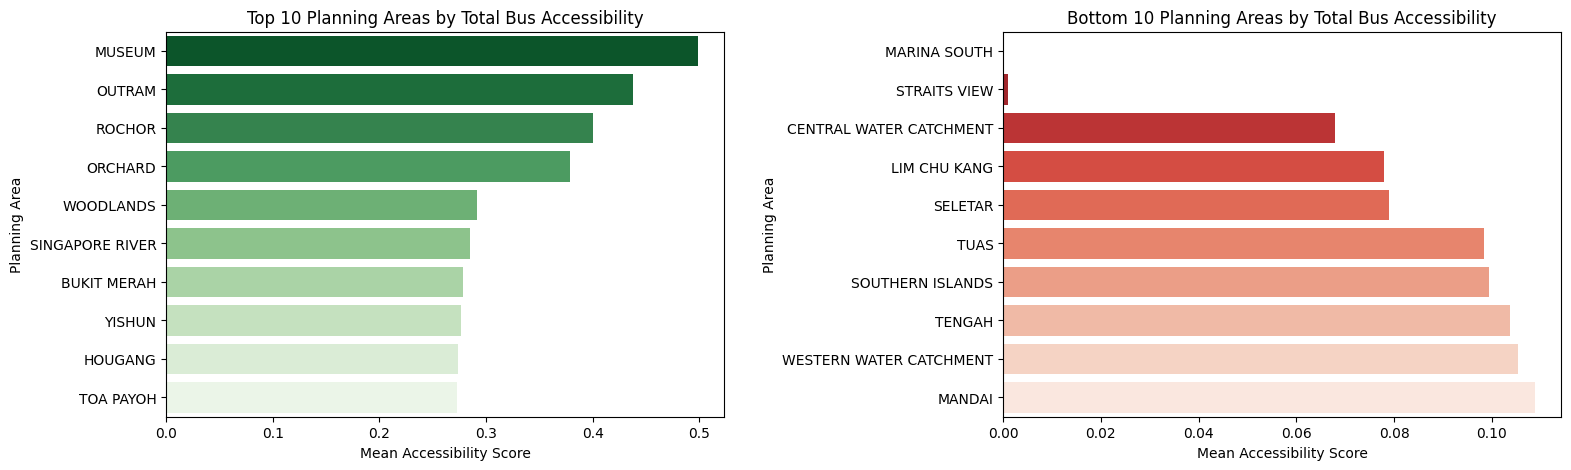

In [38]:
top_10 = planning_agg.nlargest(10, "mean_access_bus")
bottom_10 = planning_agg.nsmallest(10, "mean_access_bus")
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Top 10 planning areas
sns.barplot(y="planning_area_name", x="mean_access_bus", data=top_10, ax=ax[0], palette="Greens_r")
ax[0].set_title("Top 10 Planning Areas by Total Bus Accessibility")
ax[0].set_xlabel("Mean Accessibility Score")
ax[0].set_ylabel("Planning Area")

# Bottom 10 planning areas
sns.barplot(y="planning_area_name", x="mean_access_bus", data=bottom_10, ax=ax[1], palette="Reds_r")
ax[1].set_title("Bottom 10 Planning Areas by Total Bus Accessibility")
ax[1].set_xlabel("Mean Accessibility Score")
ax[1].set_ylabel("Planning Area")

plt.subplots_adjust(wspace=0.5) 

In [39]:
planning_agg.sort_values(by="mean_access_mrt", ascending=True)

,planning_area_name,mean_access,mean_access_bus,mean_access_mrt
19,LIM CHU KANG,0.000039,0.077943,0.000000
48,WESTERN WATER CATCHMENT,0.000633,0.105341,0.000000
20,MANDAI,0.003031,0.108735,0.000000
3,BOON LAY,0.001194,0.111032,0.000000
45,TENGAH,0.002874,0.103632,0.000000
40,SOUTHERN ISLANDS,0.000261,0.099366,0.000000
8,CENTRAL WATER CATCHMENT,0.000202,0.067858,0.000000
29,PAYA LEBAR,0.002030,0.127805,0.000000
10,CHANGI BAY,0.000101,0.114459,0.000000
35,SELETAR,0.001322,0.078857,0.000000


/var/folders/yj/8qrtgn4s6kb6mhh8f09ypm5r0000gn/T/ipykernel_10194/3261552957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="planning_area_name", x="mean_access_mrt", data=top_10, ax=ax[0], palette="Greens_r")
/var/folders/yj/8qrtgn4s6kb6mhh8f09ypm5r0000gn/T/ipykernel_10194/3261552957.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="planning_area_name", x="mean_access_mrt", data=bottom_10, ax=ax[1], palette="Reds_r")


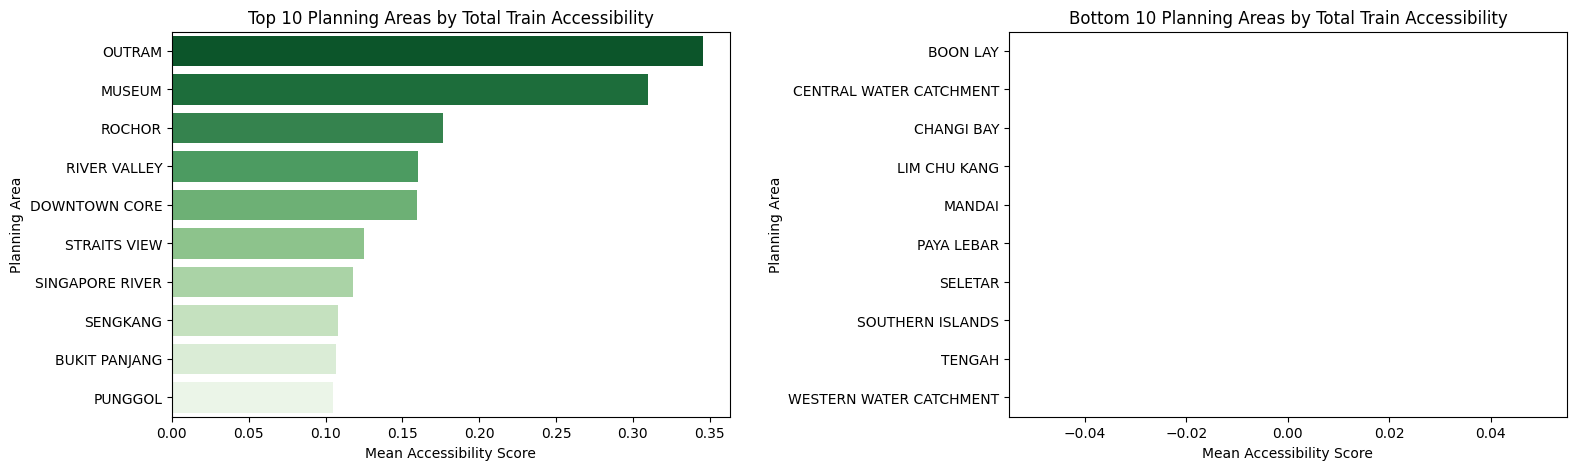

In [40]:
top_10 = planning_agg.nlargest(10, "mean_access_mrt")
bottom_10 = planning_agg.nsmallest(10, "mean_access_mrt")
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Top 10 planning areas
sns.barplot(y="planning_area_name", x="mean_access_mrt", data=top_10, ax=ax[0], palette="Greens_r")
ax[0].set_title("Top 10 Planning Areas by Total Train Accessibility")
ax[0].set_xlabel("Mean Accessibility Score")
ax[0].set_ylabel("Planning Area")

# Bottom 10 planning areas
sns.barplot(y="planning_area_name", x="mean_access_mrt", data=bottom_10, ax=ax[1], palette="Reds_r")
ax[1].set_title("Bottom 10 Planning Areas by Total Train Accessibility")
ax[1].set_xlabel("Mean Accessibility Score")
ax[1].set_ylabel("Planning Area")

plt.subplots_adjust(wspace=0.5) 

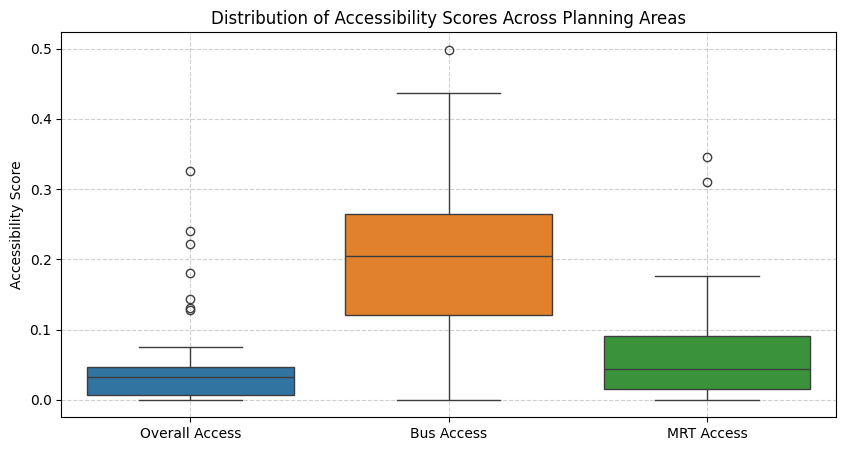

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=planning_agg[["mean_access", "mean_access_bus", "mean_access_mrt"]])
plt.title("Distribution of Accessibility Scores Across Planning Areas")
plt.ylabel("Accessibility Score")
plt.xticks([0, 1, 2], ["Overall Access", "Bus Access", "MRT Access"])
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [42]:
acc_data.to_csv("../data/final_combined_acc_pca.csv")

In [43]:
hourly_data.to_csv("../data/hourly_data_pca.csv")